# NAME - RIDDHI PATIL
# ROLL NO. - 52
# BRANCH - SE AIML
# DATE - 02/02/2026

# EXP-3 : Linear Regression: Parameter Estimation using OLS, MLE, and Gradient Descent.

# OLS

In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
# x = np.array([1,2,3]).reshape(-1,1)
# y = np.array([2,3,5])

In [21]:
x = np.array([10,20,30,50]).reshape(-1,1)
y = np.array([12,21,29,48])

In [22]:
model = LinearRegression()
model.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
w = model.coef_[0]
b = model.intercept_

In [24]:
print(f"w (slope) = {w}")
print(f"b (intercept) = {b}")

w (slope) = 0.8971428571428572
b (intercept) = 2.8285714285714256


In [25]:
y_pred = model.predict(x)
print("\nPredictions for training data:")
for xi,yi,ypi in zip(x.flatten(),y,y_pred):
    print(f"x={xi}, Actual Sales={yi}, Predicted Sales={ypi:.2f}")


Predictions for training data:
x=10, Actual Sales=12, Predicted Sales=11.80
x=20, Actual Sales=21, Predicted Sales=20.77
x=30, Actual Sales=29, Predicted Sales=29.74
x=50, Actual Sales=48, Predicted Sales=47.69


In [28]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

In [29]:
print(f"\nMean Squared Error (MSE) = {mse:.4f}")
print(f"R^2 Score = {r2:.4f}")


Mean Squared Error (MSE) = 0.1857
R^2 Score = 0.9989


# MLE

In [30]:
from scipy.optimize import minimize

In [37]:
x = np.array([1,2,3])
y = np.array([2,3,5])

In [38]:
def neg_log_likelihood(params):
    w,b = params
    sigma2 = 1
    y_pred = w*x + b
    nll = 0.5*np.sum((y - y_pred)**2/sigma2)
    return nll

In [39]:
initial_guess = [0, 0]

In [40]:
result = minimize(neg_log_likelihood, initial_guess)
w_mle, b_mle = result.x

In [41]:
print(f"MLE w = {w_mle}")
print(f"MLE b = {b_mle}")


MLE w = 1.5000000042671844
MLE b = 0.3333333912814873


In [43]:
y_pred = w_mle * x + b_mle
print("\nPredictions for training data:")
for xi,yi,ypi in zip(x.flatten(),y,y_pred):
    print(f"x={xi}, Actual Sales={yi}, Predicted Sales={ypi:.2f}")


Predictions for training data:
x=1, Actual Sales=2, Predicted Sales=1.83
x=2, Actual Sales=3, Predicted Sales=3.33
x=3, Actual Sales=5, Predicted Sales=4.83


In [44]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

In [45]:
print(f"\nMean Squared Error (MSE) = {mse:.4f}")
print(f"R^2 Score = {r2:.4f}")


Mean Squared Error (MSE) = 0.0556
R^2 Score = 0.9643


# Gradient Descent

In [78]:
import numpy as np
import matplotlib.pyplot as plt

In [79]:
w,b = 0,0
alpha = 0.0001
n_iter = 1000
n = len(x)

In [80]:
for i in range(n_iter):
    y_pred = w*x.flatten() + b
    dw = (-2/n)*np.sum(x.flatten()*(y - y_pred))
    db = (-2/n)*np.sum(y - y_pred)
    w -= alpha*dw
    b -= alpha*db
    

In [81]:
print("Slope (w):", w)
print("Intercept(b):", b)

Slope (w): 0.9277932204091286
Intercept(b): 0.4003820339618283


In [82]:
y_pred = w * x + b
print("\nPredictions for training data:")
for xi,yi,ypi in zip(x.flatten(),y,y_pred):
    print(f"x={xi}, Actual Sales={yi}, Predicted Sales={ypi:.2f}")


Predictions for training data:
x=1, Actual Sales=2, Predicted Sales=1.33
x=2, Actual Sales=3, Predicted Sales=2.26
x=3, Actual Sales=5, Predicted Sales=3.18


In [83]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

In [84]:
print(f"\nMean Squared Error (MSE) = {mse:.4f}")
print(f"R^2 Score = {r2:.4f}")


Mean Squared Error (MSE) = 1.4346
R^2 Score = 0.0778


In [85]:
x = np.array([1,2,3])
y = np.array([2,3,5])
n = len(x)

In [86]:
def loss(w1):
    w0 = np.mean(y) - w1 * np.mean(x)
    y_pred = w1 * x + w0
    return np.sum((y - y_pred) ** 2)

In [87]:
def gradient(w1):
    w0 = np.mean(y) - w1 * np.mean(x)
    y_pred = w1 * x + w0
    return - 2 * np.sum(x*(y - y_pred))

In [88]:
lr = 0.1
w1 = 4
iterations = 15

In [89]:
w1_values = []
loss_values = []

In [90]:
for i in range(iterations):
    w1_values.append(w1)
    loss_values.append(loss(w1))

    grad = gradient(w1)
    w1 = w1 - lr * grad

In [91]:
w_space = np.linspace(-2,4,200)
loss_space = [loss(w) for w in w_space]

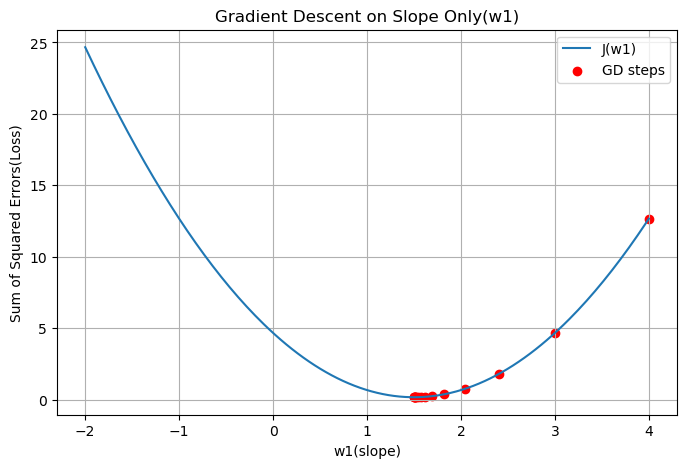

In [93]:
plt.figure(figsize=(8,5))
plt.plot(w_space, loss_space, label="J(w1)")
plt.scatter(w1_values, loss_values, color = "red", label="GD steps")
plt.xlabel("w1(slope)")
plt.ylabel("Sum of Squared Errors(Loss)")
plt.title("Gradient Descent on Slope Only(w1)")
plt.legend()
plt.grid(True)
plt.show()
